In [1]:
# Imports, always run this cell
import numpy as np
import matplotlib.pyplot as plt
import copy as cp
import random as rnd

from functools import cmp_to_key

import sklearn.datasets as skdataset
from sklearn.decomposition import PCA

import pandas as pd

In [2]:
# AUXILIARY PLOTTING FUNCTIONS

# Global plot style
plt.style.use('bmh')

def plotPoints(points, color='b', marker='o', scaleEqual=True, label=None):
    '''
    Plot points

    Note
    ----
    points is a list of np.array and each array MUST have shape (2,)
    '''

    # Adjust scale
    if scaleEqual: plt.axis('equal')

    xP = [p[0] for p in points]
    yP = [p[1] for p in points]

    if label == None: plt.scatter(x=xP, y=yP, color=color, marker=marker)
    else:             plt.scatter(x=xP, y=yP, color=color, marker=marker, label=label), plt.legend(loc='upper left')

def plotSegments(segments, color='b', marker='o', linestyle='-', scaleEqual=True):
    '''
    Plot line segments

    Note
    ----
    segments is a list of np.array and each array MUST have shape (2, 2)
    '''

    # Adjust scale
    if scaleEqual: plt.axis('equal')

    for s in segments:
        xVal = [s[0][0], s[1][0]]
        yVal = [s[0][1], s[1][1]]

        plt.plot(xVal, yVal , color=color, marker=marker, linestyle=linestyle)

def plotConvexHull(allPoints, allSegments, color='b', marker='o', linestyle='-', scaleEqual=True, label=None):
    '''
    Plot convex hull, including
    inner points and convex polygon segments

    Note
    ----
    allPoints is a list of np.array and each array MUST have shape (2,)

    allSegments is a list of np.array and each array MUST have shape (2, 2)
    '''

    # Plot both points and segments
    plotPoints(allPoints, color, marker, scaleEqual=scaleEqual, label=label)
    plotSegments(allSegments, color, marker, linestyle, scaleEqual=scaleEqual)

    plt.ylabel("Y axis")
    plt.xlabel("X axis")

def plotLineFromEquation(slope, intercept, xp, yp, color='blue', scaleEqual=True):
    '''
    Plot line given equation and a point.
    Also draw y = ax + b around a point

    Parameters
    ----------
    slope: slope of the line
    intercept: y-intercept of the line
    xp, yp: coordinates of any point from given equation

    Note
    ----
    Slope cannot be zero
    '''

    # Adjust scale
    if scaleEqual: plt.axis('equal')

    plotPoints([np.array([xp, yp])], color=color, scaleEqual=scaleEqual) 

    text = f"y = {slope:.3f}x {intercept:.3f}"

    plt.axline([xp, yp], slope=slope, color=color, label=text)
    plt.legend(loc='upper left')

    plt.ylabel("Y axis")
    plt.xlabel("X axis")
    

In [3]:
# AUXILIARY DATA STRUCTURES AND FUNCTIONS

# ======================================================= #
class Stack:
    def __init__(self):
        self.size = 0
        self.stack = []

    def push(self, obj):
        self.stack.append(obj)
        self.size += 1

    def pop(self):
        self.stack.pop()
        self.size -= 1

    def top(self):
        return self.stack[-1]

    def toList(self):
        return self.stack
    
    def len(self):
        return self.size
    
    def isEmpty(self):
        return self.size == 0

# ======================================================= #
def selectionSort(array, cmp, start, end):
    '''
    Sort an array in-place.

    Parameters
    ----------
    array: array to sort
    cmp: compare function
    start, end: start and end indexes, both inclusive

    Returns
    -------
    Sorted array
    '''

    for i in range(start, end):
        min = i
        
        for j in range(i + 1, end + 1):  
            if cmp(array[j], array[min]) == -1:
                min = j

        # Avoid swapping same element
        if min != i:
            array[i], array[min] = array[min], array[i]

    return array

# Threshold for using selection sort instead of quick sort
QS_THRESHOLD = 100

def quickSort(array, cmp, start, end):
    '''
    Sort an array in-place. Iterative implementation.
    Uses Selection Sort below a threshold for efficiency.

    Parameters
    ----------
    array: array to sort
    cmp: compare function
    start, end: start and end indexes, both inclusive

    Returns
    -------
    Sorted array
    '''

    # Iterative quicksort
    stack = Stack()
    stack.push((start, end))

    while stack.isEmpty() == False:
        # Get current partition
        (pStart, pEnd) = stack.top()
        stack.pop()

        # Use selection sort when below threshold
        if pEnd - pStart < QS_THRESHOLD:
            selectionSort(array, cmp, pStart, pEnd)
            continue
        
        i, j = pStart, pEnd
        pivot = cp.deepcopy(array[rnd.randint(pStart, pEnd)])

        # Main loop
        while i <= j:
            while cmp(pivot, array[i]) == 1:
                i += 1

            while cmp(pivot, array[j]) == -1:
                j -= 1

            # Swap [i] and [j]
            if i <= j:
                if i != j:
                    array[i], array[j] = array[j], array[i]

                i += 1
                j -= 1
        
        # Left partition
        if pStart < j:
            stack.push((pStart, j))

        # Right partition
        if i < pEnd:
            stack.push((i, pEnd))

    # Sorting happened in-place, but return anyways
    return array

# ======================================================= #
# BINARY TREE IMPLEMENTATION, SOURCE: 
# https://www.geeksforgeeks.org/deletion-in-binary-search-tree/

class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class BST:
    def __init__(self, cmp):
        self.cmp = cmp
        self.root = None

    def inOrder(self):
        inOrderAUX(self.root)

    def insert(self, key):
        self.root = insertAUX(self.root, key, self.cmp)
    
    def delete(self, key):
        self.root = deleteAUX(self.root, key, self.cmp)

    def getBelowAbove(self, key):
        findPreSucAUX.pre = None
        findPreSucAUX.suc = None

        findPreSucAUX(self.root, key, self.cmp)

        below = findPreSucAUX.pre
        above = findPreSucAUX.suc

        return below, above
        
# A utility function to do inorder traversal of BST
def inOrderAUX(root):
    if root is not None:
        inOrderAUX(root.left)
        print(root.key, end=' ')
        inOrderAUX(root.right)
 
# A utility function to insert a new node with given key in BST
def insertAUX(node, key, cmp):
    # If the tree is empty, return a new node
    if node is None:
        return Node(key)
 
    # Otherwise, recur down the tree
    if cmp(key, node.key) < 0:
        node.left = insertAUX(node.left, key, cmp)
    else:
        node.right = insertAUX(node.right, key, cmp)
 
    # return the (unchanged) node pointer
    return node
 
# Given a binary search tree and a key, this function
# deletes the key and returns the new root
def deleteAUX(root, key, cmp):
    # Base case
    if root is None:
        return root
 
    # Recursive calls for ancestors of
    # node to be deleted
    if cmp(root.key, key) > 0:
        root.left = deleteAUX(root.left, key, cmp)
        return root
    elif cmp(root.key, key) < 0:
        root.right = deleteAUX(root.right, key, cmp)
        return root
 
    # We reach here when root is the node
    # to be deleted.
 
    # If one of the children is empty
    if root.left is None:
        temp = root.right
        del root
        return temp
    elif root.right is None:
        temp = root.left
        del root
        return temp
 
    # If both children exist
    else:
        succParent = root
 
        # Find successor
        succ = root.right
        while succ.left is not None:
            succParent = succ
            succ = succ.left
 
        # Delete successor.  Since successor
        # is always left child of its parent
        # we can safely make successor's right
        # right child as left of its parent.
        # If there is no succ, then assign
        # succ.right to succParent.right
        if succParent != root:
            succParent.left = succ.right
        else:
            succParent.right = succ.right
 
        # Copy Successor Data to root
        root.key = succ.key
 
        # Delete Successor and return root
        del succ
        return root

def findPreSucAUX(root, key, cmp):
    # Base Case
    if root is None:
        return
 
    # If key is present at root
    if cmp(root.key, key) == 0:
 
        # the maximum value in left subtree is predecessor
        if root.left is not None:
            tmp = root.left 
            while(tmp.right):
                tmp = tmp.right 
            findPreSucAUX.pre = tmp 
 
        # the minimum value in right subtree is successor
        if root.right is not None:
            tmp = root.right
            while(tmp.left):
                tmp = tmp.left 
            findPreSucAUX.suc = tmp 
 
        return
 
    # If key is smaller than root's key, go to left subtree
    if cmp(root.key, key) > 0:
        findPreSucAUX.suc = root 
        findPreSucAUX(root.left, key, cmp)
 
    else: # go to right subtree
        findPreSucAUX.pre = root
        findPreSucAUX(root.right, key, cmp)

In [4]:
# BASIC GEOMETRY FUNCTIONS

def getOrientation(origin, a, b):
    '''
    Get orientation between two vectors in 2D space.

    Parameters
    ----------
    origin: common point between vectors
    a: vector a
    b: vector b

    Returns
    -------
    1: a is clockwise of b
    -1: a is anti-clockwise of b
    0: a and b are colinear
    '''

    # Offset common origin from a and b
    # This way a and b are vectors with origin at (0, 0)
    A = a - origin
    B = b - origin

    return np.sign(A[0] * B[1] - (A[1] * B[0]))

def getDirection(p0, p1, p2):
    '''
    Get turn direction between three consecutive points

    Parameters
    ----------
    p0, p1, p2: consecutive points as in p0 -> p1 -> p2

    Returns
    -------
    1: going from p0 to p2 makes a right turn
    -1: going from p0 to p2 makes a left turn
    0: there's no change of direction

    Note
    ----
    Points must have x and y coordinates
    '''

    return getOrientation(p0, p2, p1)

# Constants for readability
TURN_LEFT  = ANTI_CLOCKWISE = -1
TURN_RIGHT = CLOCKWISE      = 1
NO_CHANGE  = COLINEAR       = 0
X_AXIS     = 0
Y_AXIS     = 1

In [5]:
# BASIC LINE GEOMETRY

def isOnSegment(start, end, p) -> bool: 
    '''
    Check if point p is on segment [start <-> end]

    Parameters
    ----------
    start, end, p. Start and end are the limits of a segment, and p is a point

    Returns
    -------
    True - p is on segment [start, end]
    False - p is not on segment [start, end]

    Note
    ----
    Points must have x and y coordinates
    '''
    pIsBetweenStartEnd_ifAscending = p[1] >= start[1] and p[1] <= end[1] and p[0] >= start[0] and p[0] <= end[0]
    pIsBetweenStartEnd_ifDescending = p[1] <= start[1] and p[1] >= end[1] and p[0] <= start[0] and p[0] >= end[0]
    
    if (pIsBetweenStartEnd_ifAscending or pIsBetweenStartEnd_ifDescending):
        return True

    return False


def hasIntersection(A, B, ignoreSamePoint=False, epsilon=1e-6) -> bool:
    '''
    Check intersection between 2 line segments

    Parameters
    ----------
    A, B: segments A and B each as an np.array of shape (2, 2)

    Returns
    -------
    True - There is an intersection
    False - There is not

    Note
    ----
    Segments must have 2 points with x and y coordinates each
    '''

    Astart, Aend, Bstart, Bend = A[0], A[1], B[0], B[1]

    # Edge case for convex hull, ignore intersections when endpoints are roughly the same
    if ignoreSamePoint:
        SS = np.allclose(Astart, Bstart, atol=epsilon, rtol=epsilon)
        SE = np.allclose(Astart, Bend,   atol=epsilon, rtol=epsilon)
        ES = np.allclose(Aend,   Bstart, atol=epsilon, rtol=epsilon)
        EE = np.allclose(Aend,   Bend,   atol=epsilon, rtol=epsilon)

        if SS or SE or ES or EE:
            return False

    # Vanilla steps
    direction1 = getDirection(Astart, Aend, Bstart)
    direction2 = getDirection(Astart, Aend, Bend)
    direction3 = getDirection(Bstart, Bend, Astart)
    direction4 = getDirection(Bstart, Bend, Aend)

    BisBetweenA = (direction3 > 0 and direction4 < 0) or (direction3 < 0 and direction4 > 0)
    AisBetweenB = (direction1 > 0 and direction2 < 0) or (direction1 < 0 and direction2 > 0)

    if (BisBetweenA and AisBetweenB):
        return True
    elif (direction1 == 0):
        return isOnSegment(Astart, Aend, Bstart)
    elif (direction2 == 0):
        return isOnSegment(Astart, Aend, Bend)
    elif (direction3 == 0):
        return isOnSegment(Bstart, Bend, Astart)
    elif (direction4 == 0):
        return isOnSegment(Bstart, Bend, Aend)
    
    return False

In [6]:
# GRAHAM SCAN IMPLEMENTATION

# Global for anchor value used by compare
global CURRENT_ANCHOR

def grahamCompare(a, b):
    # A compare function returns:
    # >= 1  if A is greater than B
    # <= -1 if A is smaller than B
    # 0  if they are equal

    ori = getOrientation(CURRENT_ANCHOR, a, b)

    # A is "smaller" than B, closer to anchor
    if   ori == CLOCKWISE:
        return -1
    elif ori == COLINEAR:
        # if colinear, choose furthest point
        distA = np.linalg.norm(CURRENT_ANCHOR - a)
        distB = np.linalg.norm(CURRENT_ANCHOR - b)

        if distA > distB:
            return -1 # A is furthest
        elif distA == distB:
            return 0  # Equal distance
        else:
            return 1  # B is furthest 
    
    # A is "greater" than B, further from anchor
    else:    
        return 1
    
def toSegments(hull: list) -> list:
    segList = []

    for i in range(len(hull) - 1):
        p0 = hull[i]
        p1 = hull[i+1]

        segment = np.array([[p0[0], p0[1]], [p1[0], p1[1]]])
        segList.append(segment)

    # Connect end to start
    p0 = hull[-1]
    p1 = hull[0]

    segment = np.array([[p0[0], p0[1]], [p1[0], p1[1]]])
    segList.append(segment)

    return segList

def getAnchorIdx(array: list, epsilon=1e-6) -> int:
    anchorIdx = 0

    # Find southwest-most point
    for i in range(len(array)):
        # If there's a tie, choose point with smallest X
        if abs(array[i][1] - array[anchorIdx][1]) < epsilon:
            if (array[i][0] < array[anchorIdx][0]):
                anchorIdx = i

        # Look for point with smallest Y
        elif array[i][1] < array[anchorIdx][1]:
            anchorIdx = i
    
    return anchorIdx

def grahamScan(array: list) -> list:
    size = len(array)

    # Find anchor
    anchorIdx = getAnchorIdx(array)
    
    # Put anchor at the start
    array[0], array[anchorIdx] = array[anchorIdx], array[0]

    # Set anchor used for compare
    global CURRENT_ANCHOR; CURRENT_ANCHOR = array[0]
    
    # Sort in relation to anchor
    quickSort(array, grahamCompare, 1, size - 1)
    #array[1:].sort(key=cmp_to_key(compare)) # Does not work, key function gets wild
    
    # Init points (first 3 always included)
    hull = [array[0], array[1], array[2]]

    # Skip if there's only three points
    if (size > 3):
        for i in range(3, size):
            # Skip equal points
            if np.allclose(hull[-1], array[i]): 
                continue
            
            # Test right turn
            while (getDirection(hull[-2], hull[-1], array[i]) == TURN_RIGHT):
                hull.pop()

            hull.append(array[i]) 

    # Convert hull points to segments
    # Adding points for consecutive segments and connecting last to start
    return toSegments(hull), hull

In [7]:
# LINEAR SWEEPING IMPLEMENTATION

class Endpoint:
    def __init__(self, p, pos, seg):
        self.p = p
        self.pos = pos
        self.seg = seg

# Transform segments for comparison
def segmentsToEndpoints(segments):
    endpoints = []

    for seg in segments:
        # First point is to the left 
        if (seg[0][0] < seg[1][0]):
            endpoints.append(Endpoint(seg[0], 'l', seg))
            endpoints.append(Endpoint(seg[1], 'r', seg))
        # First point is to the right 
        else:
            endpoints.append(Endpoint(seg[0], 'r', seg))
            endpoints.append(Endpoint(seg[1], 'l', seg))
    
    return endpoints

# Compare segments for binary tree
def segmentCompare(a, b, epsilon=1e-6):
    # First y coordinate
    diff = a[0][1] - b[0][1]

    if abs(diff) > epsilon:
        return np.sign(diff)
    
    # Second y coordinate
    diff = a[1][1] - b[1][1]

    if abs(diff) > epsilon:
        return np.sign(diff)

    return 0
    
# Compare endpoints for sorting
def endpointCompare(a, b, epsilon=1e-6):
    # Order by x coordinate of point
    diff = a.p[0] - b.p[0]

    # Different x coordinate:
    # Leftmost points first
    if abs(diff) > epsilon:
        return np.sign(diff)
    
    # 1st tiebreaker: Same x coordinate
    # Left endpoints first
    # Naturally 'l' - 'r' gives a negative number
    diff = ord(a.pos) - ord(b.pos)
    
    if diff != 0:
        return diff

    # 2nd tiebreaker: Same x coordinate and same position
    # Lower y coordinates first
    diff = a.p[1] - b.p[1]

    if abs(diff) > epsilon:
        return np.sign(diff)

    # Else they are equal (unlikely)
    return 0

def linearSweeping(segments: list, ignoreSamePoint=False) -> bool:
    # Forward flag for hasIntersection
    flag = ignoreSamePoint

    # Get points and position (left or right)
    endpoints = segmentsToEndpoints(segments)

    # Sort endpoints  
    endpoints.sort(key=cmp_to_key(endpointCompare))

    # Init tree
    tree = BST(cmp=segmentCompare)

    # Main loop
    for e in endpoints:
        position, S = e.pos, e.seg

        # Left endpoint
        if position == 'l':
            tree.insert(S)

            B, A = tree.getBelowAbove(S)

            if (A != None and hasIntersection(A.key, S, flag)) \
            or (B != None and hasIntersection(B.key, S, flag)):
                return True
           
        # Right endpoint
        if position == 'r':
            B, A = tree.getBelowAbove(S)

            if (A != None and B != None and hasIntersection(A.key, B.key, flag)):
                return True

            tree.delete(S)

    return False

In [8]:
# FIND PERPENDICULAR LINE IMPLEMENTATION

def findPerpendicularLineEq(segment) -> (int, int, int, int):
    # Find segment line equation
    p0 = segment[0]
    p1 = segment[1]

    slope = (p0[1] - p1[1]) / (p0[0] - p1[0])
    intercept = p0[1] - slope * p0[0]

    # Calculate cartesian distance
    w = p0 - p1

    # Find middle point
    xMiddle = p1[0] + w[0] * 0.5
    yMiddle = p1[1] + w[1] * 0.5

    # New slope for perpendicular
    slope = -1 / slope
    
    # New intercept for perpendicular
    intercept = yMiddle - slope * xMiddle 

    return slope, intercept, xMiddle, yMiddle

In [9]:
# FIND CLOSEST POINTS IMPLEMENTATION

def findClosestPointsBetweenTwoConvexHulls(hull1, hull2):
    '''
    Important !!!! = Verify before if the convex hulls have intersection

    Find the closests points between two convex hulls.
    This is necessary to separate the convex hulls with a perpendicular segment

    Return: np.array of shape (2, 2) with segment formed by points
    '''

    lessDist1_2 = np.inf

    for i in hull1:
        for j in hull2:
            distA = np.linalg.norm(i - j)
            if distA < lessDist1_2:
                lessDist1_2 = distA
                closestPointToHull1 = j
                closestPointToHull2 = i 
                
    return np.array([closestPointToHull2, closestPointToHull1])

In [129]:
# classificate point if are above or below the perpendicular segment between convex hulls
# this is important to mark points with labels according to this result

def checkPointInModel(p, segmentSlope, segmentIntercept):
    
    segmentYWhenX0 = segmentSlope * 0 + segmentIntercept
    segmentYWhenX1 = segmentSlope * 1 + segmentIntercept

    vectorX0Y = np.array([0, segmentYWhenX0])
    vectorX1Y = np.array([1, segmentYWhenX1])

    orientation = getOrientation(vectorX0Y, p, vectorX1Y)

    return orientation

def addLabelToNewPoint(p, segmentSlope, segmentIntercept):
    '''
        Return 0 if point is in model
        Return 1 is point is below model
        Return -1 is point is above model
    '''

    orientation = checkPointInModel (p, segmentSlope, segmentIntercept)

    if (orientation == CLOCKWISE):
        #"Point is BELOW the perpendicular segment"
        return CLOCKWISE
    elif (orientation == ANTI_CLOCKWISE):
        #"Point is ABOVE the perpendicular segment"
        return ANTI_CLOCKWISE
    else:
        #"Point is IN the perpendicular segment"
        return COLINEAR

In [11]:

def plotConvexHullDatabases(databaseTarget, databaseAfterPCA, scaleEqual=True):
    separateData = {}

    for t in databaseTarget:
        separateData[str(t)] = []

    for i in range(databaseAfterPCA.shape[0]):
        oldValue = separateData[str(databaseTarget[i])]

        oldValue.append(databaseAfterPCA[i])
        separateData[str(databaseTarget[i])] = oldValue

    color = iter(plt.cm.rainbow(np.linspace(0, 1, len(separateData))))

    for k, v in separateData.items():
        hullSeg, hullPoints = grahamScan(v)

        plotConvexHull(v, hullSeg, marker='.', color=next(color), scaleEqual=scaleEqual, label=str(k))

In [12]:
# Function to separate databases for testing and for training

def generateTrainingAndTestingData(database, databaseTarget):
    
    database70 = []
    database70target = []
    database30 = []
    database30target = []

    for (i, j) in zip(database, databaseTarget):
        rand = np.random.randint(0,100)
        if (rand >= 70):
            database30.append(i)
            database30target.append(j)
        else:
            database70.append(i)
            database70target.append(j)
    
    database70       = np.array(database70)
    database70target = np.array(database70target)
    database30       = np.array(database30)
    database30target = np.array(database30target)

    return (database70, database70target, database30, database30target)

def separateDatabaseByTarget(database, databaseTarget, targetId):
    equal, equalLabel = [], []
    diff, diffLabel = [], []

    for (data, label) in zip(database, databaseTarget):
        if (label == targetId):
            equal.append(data)
            equalLabel.append(label)
        else:
            diff.append(data)
            diffLabel.append(label)
    
    equal      = np.array(equal)
    equalLabel = np.array(equalLabel)
    diff       = np.array(diff)
    diffLabel  = np.array(diffLabel)

    return (equal, equalLabel, diff, diffLabel)

In [13]:
def filterTrainingDataToCreateModel(trainingData, trainingDataLabel, testData, testDataLabel, axis, low, high):
    trainingDataList      = [x for x in trainingData]
    trainingDataLabelList = [x for x in trainingDataLabel]
    testDataList          = [x for x in testData]
    testDataLabelList     = [x for x in testDataLabel]

    trainingDataListNew = []
    trainingDataLabelListNew = []

    for i in range(len(trainingDataList)):
        if trainingDataList[i][axis] > low and trainingDataList[i][axis] < high:
            testDataList.append(trainingDataList[i])
            testDataLabelList.append(trainingDataLabelList[i])
        else:
            trainingDataListNew.append(trainingDataList[i])
            trainingDataLabelListNew.append(trainingDataLabelList[i])

    trainingData      = np.array(trainingDataListNew)
    trainingDataLabel = np.array(trainingDataLabelListNew)
    testData          = np.array(testDataList)
    testDataLabel     = np.array(testDataLabelList)

    return trainingData, trainingDataLabel, testData, testDataLabel

def generateTrainingAndTestingDataFiltered(database, databaseTarget, axis, low, high):
    trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingData(database, databaseTarget)

    return filterTrainingDataToCreateModel(trainingData, trainingDataLabel,
                                           testData, testDataLabel,
                                           axis, low, high)

In [14]:
def checkInnerHull(hull1, hull2):
    for j in range(len(hull2) - 1):
        for i in range(len(hull1)):
            if getDirection(hull1[i], hull2[j], hull2[j+1]) == TURN_RIGHT:
                return False

    return True

def generateModelAndPlot(trainingData, trainingDataLabel, targetLabelId, scaleEqual=True):
    dataLabel, labelTarget, dataDiff, diffTarget = separateDatabaseByTarget(trainingData, trainingDataLabel, targetLabelId)

    labelSeg, labelPoints = grahamScan([x for x in dataLabel])
    diffSeg, diffPoints = grahamScan([x for x in dataDiff])

    hullsIntersect = linearSweeping(labelSeg + diffSeg, True)
    if hullsIntersect:
        print(f"Selected hulls intersect for target ID {targetLabelId}. Unable to generate model due to data being inseparable")
        return
    elif checkInnerHull(labelPoints, diffPoints) or checkInnerHull(diffPoints, labelPoints):
        print(f"At least one hull is inside another for target ID {targetLabelId}. Unable to generate model due to data being inseparable")
        return
    else:
        print("Selected hulls do not intersect, generating model...")

    plotConvexHull([x for x in dataLabel], labelSeg, marker='.', color='green', scaleEqual=scaleEqual)
    plotConvexHull([x for x in dataDiff], diffSeg, marker='.', scaleEqual=scaleEqual)

    closestSeg = findClosestPointsBetweenTwoConvexHulls(labelPoints, diffPoints)

    plotSegments([closestSeg], color='red', scaleEqual=scaleEqual)

    slope, intercept, xMiddle, yMiddle = findPerpendicularLineEq(closestSeg)

    plotLineFromEquation(slope, intercept, xMiddle, yMiddle, color='black', scaleEqual=scaleEqual)

    return slope, intercept

In [138]:
def runModelAndGetMetrics(database, databaseTarget, targetId, targetIdOrientation, eqSlope, eqIntercept):
    testTarget = []

    # Get model results
    for point in database:
        if (checkPointInModel(point, eqSlope, eqIntercept) == targetIdOrientation):
            testTarget.append(targetId)
        else:
            testTarget.append(-100) # Not ID

    # Count hits and misses
    TP, FP, TN, FN = 0, 0, 0, 0

    for i,j in zip(databaseTarget, testTarget):
        if (i == j == targetId):
            TP += 1
        elif (i != targetId and j != targetId):
            TN += 1
        elif (i != j):
            if j == targetId:
                FP += 1
            elif j != targetId:
                FN += 1

    # Taken from https://en.wikipedia.org/wiki/Precision_and_recall 
    # and https://en.wikipedia.org/wiki/F-score

    # Get statistics
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = (2 * precision * recall) / (precision + recall)

    print("True Positive:", TP, "False Positive:", FP, "True Negative:", TN, "False Negative:", FN, end="\n\n")

    return (precision * 100, recall * 100, f1 * 100)

In [156]:
def getOrientationConvexHullTargetToModel (trainingData, trainingDataLabel, slope, intercept, targetToBeSeparated):
    point = 0
    for i in range(len(trainingData)):
        if trainingDataLabel[i] == targetToBeSeparated:
            point = trainingData[i]
            break

    return addLabelToNewPoint(point, slope, intercept)



In [16]:
# AUX FUNCTION TO MAKE PANDAS DF FROM CSV COMPATIBLE WITH ALL OTHER FUNCTIONS

def getNumericTargetFromDataframe(dfColumn):
    targetDict = {}
    count = 0

    numTarget = []

    for row in dfColumn:
        if targetDict.__contains__(str(row)):
            numTarget.append(targetDict[str(row)])
        else:
            targetDict[str(row)] = count
            count += 1
            numTarget.append(targetDict[str(row)])
    
    return numTarget

## Relatório TP1 - Algoritmos 2

Gabriel Pains de Oliveira Cardoso - 2021096887 

Francisco Teixeira Rocha Aragão - 2021031726

---

A seguir, são avaliados 10 datasets utilizando-se as ferramentas desenvolvidas durante o trabalho, são elas:

- PlotConvexHullDatabases = Realiza o plot dos dados selecionados de acordo com a envoltória convexa correspondente a cada uma das classes (target) que representam a database.
- De acordo com o tipo dos dados, são executadas duas diferentes funções:
    - GenerateTrainingAndTestingData = Separa o dataset em dados de treino e teste de maneira aleatória, seguindo a proporção (aproximada) de 70% para treino e 30% para teste.
    - GenerateTrainingAndTestingDataFiltered = Igual a função anterior, porém, essa função é utilizada para datasets em que ocorre interseção entre os dados. Dessa forma, os pontos em que ocorrem interseção são retirados, sendo adicionados então no conjunto de testes, para assim ser possível construir a reta do modelo.
- GenerateModelAndPlot = Primeiramente o database é separado de acordo com as suas diferentes classes (targets), sendo construida uma envoltória para uma dessas classes. Posteriormente é verificado se existe intersecção entre as envoltórias através de linear sweeping e verificações de giros e posicionamento entre segmentos. Caso não houver interseção envolvendo pelo menos uma das classes, o modelo é criado, gerando uma reta perpendicular entre a classe que não possui intersecção e as demais.
- GetOrientationConvexHullTargetToModel = Retorna se a envoltória convexa usada como target está acima ou abaixo da reta do modelo. 
- RunModelAndGetMetrics = Classifica os dados de teste de acordo com o modelo encontrado, retornando as métricas para avaliar o resultado da classificação.

----

# Dataset 1: Iris
*Extraído de https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris*

### **Passo 1: Tratamento de dados** 

Carregar o dataset e realizar a projeção em 2 dimensões

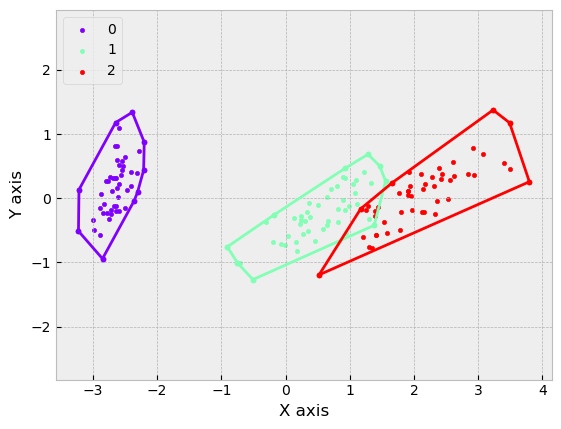

In [158]:
# Dataset test

iris = skdataset.load_iris()

pca = PCA(n_components=2)

pca.fit(iris.data)

iris2D = pca.transform(iris.data)

plotConvexHullDatabases(iris.target, iris2D)

### **Passo 2: Criação do modelo (se separável)** 

O dataset aparenta ser separável para a categoria 0, assim o modelo será construído usando essa categoria como base.

O modelo resultante é binário e classifica os pontos em pertence à categoria 0 ou não pertence.

**Nota:** O modelo será criado usando dados de treinamento, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

*A cada vez que essa célula é executada, uma nova amostra aleatória de (aproximadamente) 70/30 é realizada.*

Selected hulls do not intersect, generating model...


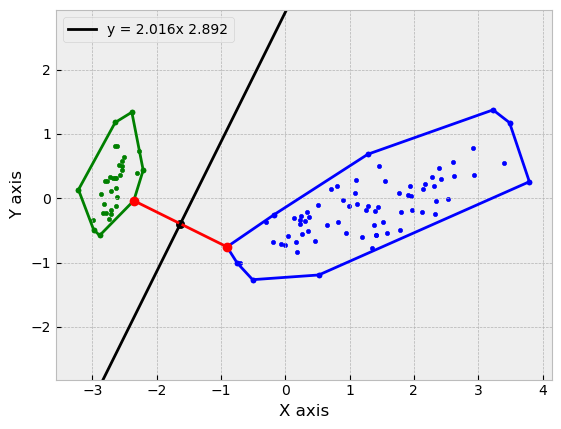

In [159]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingData(iris2D, iris.target)

targetToBeSeparated = 0

slope, intercept = generateModelAndPlot(trainingData, trainingDataLabel, targetToBeSeparated)

### **Passo 3: Execução de testes e coleta de métricas**

A partir do modelo resultante (equação da reta). Os dados de teste são usados para avaliar seu desempenho.

In [160]:
direction = getOrientationConvexHullTargetToModel(trainingData, trainingDataLabel, slope, intercept, targetToBeSeparated)

precision, recall, f1 = runModelAndGetMetrics(testData, testDataLabel, targetToBeSeparated, direction, slope, intercept)

print(f"Precision: {precision:1f} %")
print(f"Recall: {recall:1f} %")
print(f"F1-Score: {f1:1f} %")

True Positive: 15 False Positive: 0 True Negative: 27 False Negative: 0

Precision: 100.000000 %
Recall: 100.000000 %
F1-Score: 100.000000 %


### **Passo 4: Análise dos resultados**

De acordo com os resultados obtidos, percebemos que o modelo criado foi capaz de classificar todos os dados corretamente, sem nenhum falso positivo ou falso negativo. Isso ocorreu pois após o PCA, os dados não apresentaram intersecção entre a categoria 0 e as demais, sendo possível traçar uma reta que explicasse a separação entre os valores.

---

# Dataset 2: Wine
*Extraído de https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine*

### **Passo 1: Tratamento de dados** 

Carregar o dataset e realizar a projeção em 2 dimensões

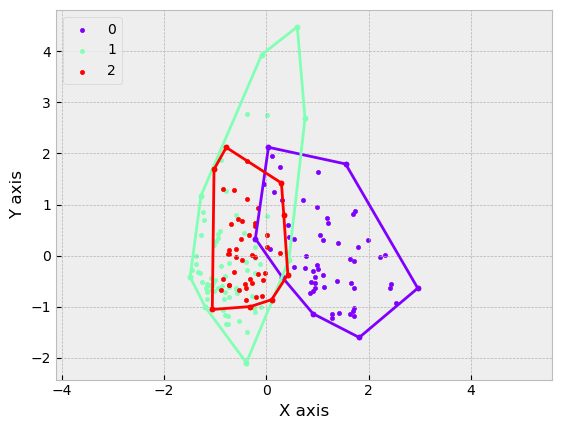

In [161]:
wine = skdataset.load_wine()

X_wine, Y_wine = wine.data, wine.target

pca = PCA(n_components=2, whiten=True)

pca.fit(X_wine)

wine2D = pca.transform(X_wine)

wineTarget = wine.target

plotConvexHullDatabases(wineTarget, wine2D)

### **Passo 2: Filtragem de dados** 

O dataset aparenta ser QUASE separável para a categoria 0, vamos adaptar o dataset para construir uma reta mesmo assim. Isso será feito da seguinte forma:

- Limpar uma seção horizontal ou vertical de pontos, adicionando-se os pontos removidos aos dados de testes.
- Gerar o modelo com o dataset resultante.
- Executar os testes normalmente, os pontos removidos anteriormente serão testados no modelo.

Assim, será gerado um modelo que QUASE separa todos os dados de forma precisa, mas deve apresentar erros devido aos pontos filtrados nesta etapa.

**Nota:** O modelo será criado usando dados de treinamento filtrados, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

*A cada vez que essa célula é executada, uma nova amostra aleatória de (aproximadamente) 70/30 é realizada.*

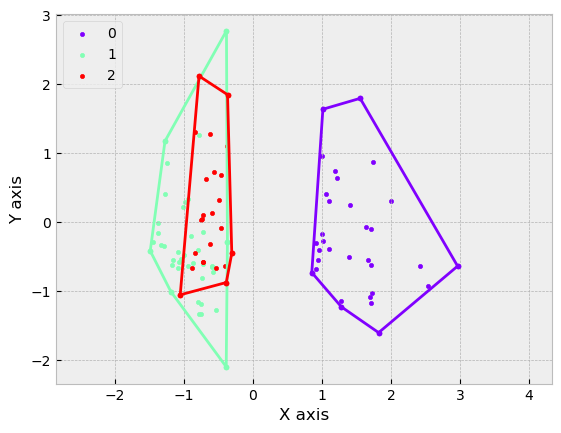

In [168]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingDataFiltered(wine2D, wineTarget, X_AXIS, -0.3, 0.8)

plotConvexHullDatabases(trainingDataLabel, trainingData)

### **Passo 3: Criação do modelo (se separável)** 

O dataset agora aparenta ser separável para a categoria 0, assim o modelo será construído usando essa categoria como base.

O modelo resultante é binário e classifica os pontos em pertence à categoria 0 ou não pertence.

**Nota:** O modelo será criado usando dados de treinamento, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.


Selected hulls do not intersect, generating model...


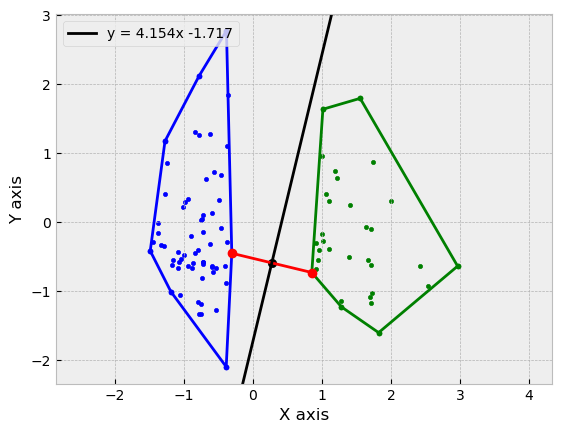

In [169]:
targetToBeSeparated = 0

slope, intercept = generateModelAndPlot(trainingData, trainingDataLabel, targetToBeSeparated)

### **Passo 4: Execução de testes e coleta de métricas**

A partir do modelo resultante (equação da reta). Os dados de teste são usados para avaliar seu desempenho.

In [170]:
direction = getOrientationConvexHullTargetToModel(trainingData, trainingDataLabel, slope, intercept, targetToBeSeparated)

precision, recall, f1 = runModelAndGetMetrics(testData, testDataLabel, targetToBeSeparated, direction, slope, intercept)

print(f"Precision: {precision:1f} %")
print(f"Recall: {recall:1f} %")
print(f"F1-Score: {f1:1f} %")

True Positive: 16 False Positive: 2 True Negative: 54 False Negative: 11

Precision: 88.888889 %
Recall: 59.259259 %
F1-Score: 71.111111 %


### **Passo 5: Análise dos resultados**

Como os dados não eram separáveis após o PCA, forçamos a separação removendo alguns dados que se interceptavam e os adicionando aos dados de teste. Por conta disso, a reta gerada no modelo não conseguiu classificar bem todos os dados, errando justamente nos pontos que estavam na interseção. Por isso ocorrem valores de falso positivo e falso negativo.
Dessa forma, os valores de precisão e recall são impactados, o que abaixa o resultado também do f1-score.

---

# Dataset 3: Dermatology
*Extraído de https://github.com/Mereep/keel_csv/blob/master/standard_classification/onehot/dermatology.prepared.csv*

### **Passo 1: Tratamento de dados** 

Carregar o dataset e realizar a projeção em 2 dimensões

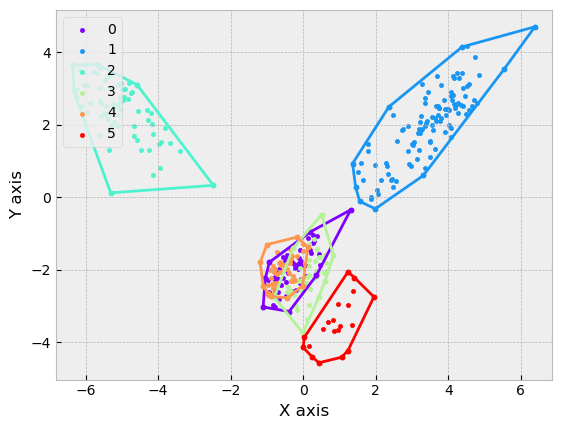

In [176]:
df = pd.read_csv("datasets/dermatology.prepared.csv")

# Generate numeric target labels
dermatologyTarget = getNumericTargetFromDataframe(df['Class'])

# Drop target column
df.drop(columns=['Class'], inplace=True)

pca = PCA(n_components=2)

pca.fit(df)

dermatology2D = pca.transform(df)

plotConvexHullDatabases(dermatologyTarget, dermatology2D)

### **Passo 2: Criação do modelo (se separável)** 

O dataset aparenta ser separável para a categoria 2, assim o modelo será construído usando essa categoria como base.

O modelo resultante é binário e classifica os pontos em pertence à categoria 0 ou não pertence.

**Nota:** O modelo será criado usando dados de treinamento, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

*A cada vez que essa célula é executada, uma nova amostra aleatória de (aproximadamente) 70/30 é realizada.*

Selected hulls do not intersect, generating model...


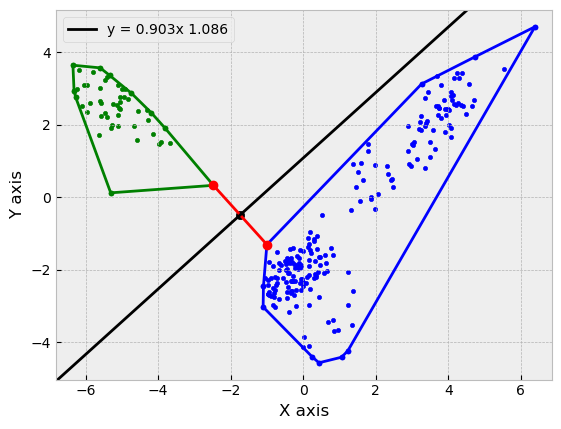

In [185]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingData(dermatology2D, dermatologyTarget)

targetToBeSeparated = 2

slope, intercept = generateModelAndPlot(trainingData, trainingDataLabel, targetLabelId=targetToBeSeparated)

### **Passo 3: Execução de testes e coleta de métricas**

A partir do modelo resultante (equação da reta). Os dados de teste são usados para avaliar seu desempenho.

In [186]:
direction = getOrientationConvexHullTargetToModel(trainingData, trainingDataLabel, slope, intercept, targetToBeSeparated)

precision, recall, f1 = runModelAndGetMetrics(testData, testDataLabel, targetToBeSeparated, direction, slope, intercept)

print(f"Precision: {precision:1f} %")
print(f"Recall: {recall:1f} %")
print(f"F1-Score: {f1:1f} %")

True Positive: 20 False Positive: 0 True Negative: 78 False Negative: 0

Precision: 100.000000 %
Recall: 100.000000 %
F1-Score: 100.000000 %


### **Passo 4: Análise dos resultados**

De acordo com os resultados obtidos, percebemos que o modelo criado foi capaz de classificar todos os dados corretamente (na grande maioria das vezes, visto que como os pontos são escolhidos aleatoriamente, em alguma iteração pode ser que os pontos escolhidos formem uma reta que passe por alguma das envoltórias), sem nenhum falso positivo ou falso negativo. Isso ocorreu pois após o PCA, os dados não apresentaram interseção entre a categoria 0 e as demais, sendo possível traçar uma reta que explicasse a separação entre os valores.

---

# Dataset 4: Breast Cancer
*Extraído de https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer*

### **Passo 1: Tratamento de dados** 

Carregar o dataset e realizar a projeção em 2 dimensões

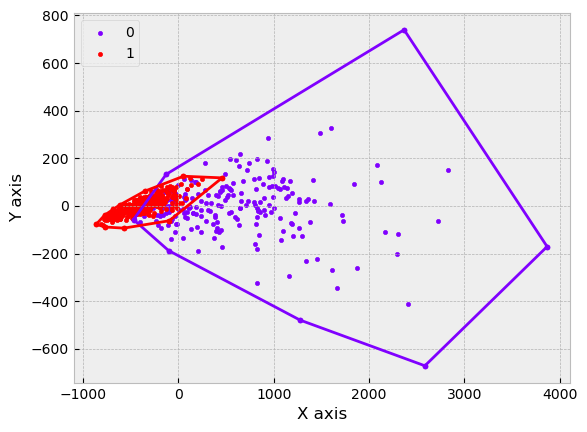

In [187]:
breastCancer = skdataset.load_breast_cancer()
X_breastCancer, breastCancerTarget = breastCancer.data, breastCancer.target

pca = PCA(n_components=2)

pca.fit(X_breastCancer)

breastCancer2D = pca.transform(X_breastCancer)

plotConvexHullDatabases(breastCancer.target, breastCancer2D, scaleEqual=False)

### **Passo 2: Filtragem de dados** 

O dataset aparenta ser QUASE separável para a categoria 0, vamos adaptar o dataset para construir uma reta mesmo assim. Isso será feito da seguinte forma:

- Limpar uma seção horizontal ou vertical de pontos, adicionando-se os pontos removidos aos dados de testes.
- Gerar o modelo com o dataset resultante.
- Executar os testes normalmente, os pontos removidos anteriormente serão testados no modelo.

Assim, será gerado um modelo que QUASE separa todos os dados de forma precisa, mas deve apresentar erros devido aos pontos filtrados nesta etapa.

**Nota:** O modelo será criado usando dados de treinamento filtrados, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

*A cada vez que essa célula é executada, uma nova amostra aleatória de (aproximadamente) 70/30 é realizada.*

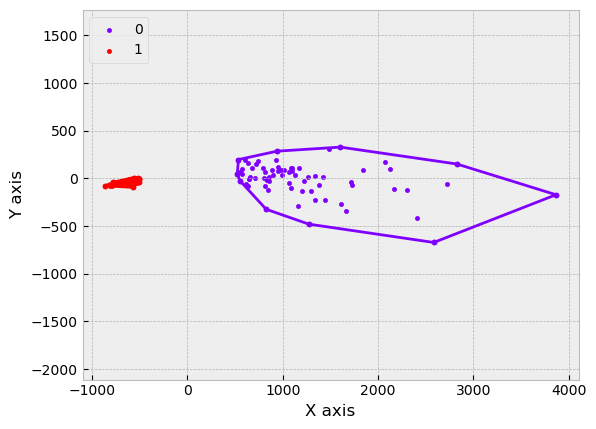

In [188]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingDataFiltered(breastCancer2D, breastCancerTarget, X_AXIS, -500, 500)

plotConvexHullDatabases(trainingDataLabel, trainingData)

### **Passo 3: Criação do modelo (se separável)** 

O dataset aparenta ser separável para a categoria 0, assim o modelo será construído usando essa categoria como base.

O modelo resultante é binário e classifica os pontos em pertence à categoria 0 ou não pertence.

**Nota:** O modelo será criado usando dados de treinamento, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

*A cada vez que essa célula é executada, uma nova amostra aleatória de 70/30 é realizada.*

Selected hulls do not intersect, generating model...


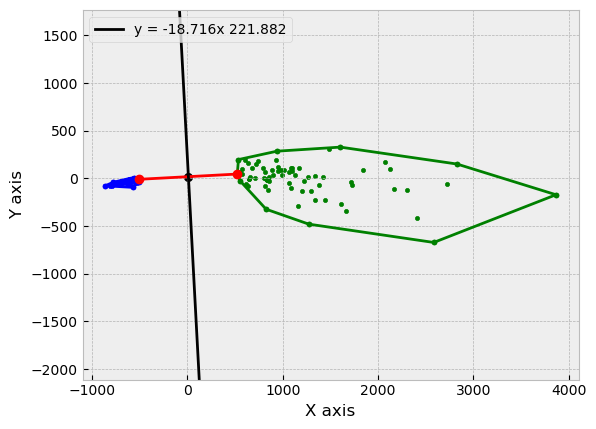

In [189]:
targetToBeSeparated = 0

slope, intercept = generateModelAndPlot(trainingData, trainingDataLabel, targetToBeSeparated)

### **Passo 4: Execução de testes e coleta de métricas**

A partir do modelo resultante (equação da reta). Os dados de teste são usados para avaliar seu desempenho.

In [190]:
direction = getOrientationConvexHullTargetToModel(trainingData, trainingDataLabel, slope, intercept, targetToBeSeparated)

precision, recall, f1 = runModelAndGetMetrics(testData, testDataLabel, targetToBeSeparated, direction, slope, intercept)

print(f"Precision: {precision:1f} %")
print(f"Recall: {recall:1f} %")
print(f"F1-Score: {f1:1f} %")

True Positive: 98 False Positive: 10 True Negative: 280 False Negative: 42

Precision: 90.740741 %
Recall: 70.000000 %
F1-Score: 79.032258 %


### **Passo 5: Análise dos resultados**

Como os dados não eram separáveis após o PCA, forçamos a separação removendo alguns dados que se interceptavam e os adicionando aos dados de teste. Por conta disso, a reta gerada no modelo não conseguiu classificar bem todos os dados, errando justamente nos pontos que estavam na interseção. Por isso ocorrem valores de falso positivo e falso negativo. Dessa forma, os valores de precisão e recall são impactados, o que abaixa o resultado também do f1-score. 

Em específico, como a interseção ocorreu com vários pontos do lado direito da reta, o modelo obteve vários falsos negativos, impactando com mais intensidade a métrica de recall.


---

# Dataset 5: Penguins
*Extraído de https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv*

### **Passo 1: Tratamento de dados** 

Carregar o dataset e realizar a projeção em 2 dimensões

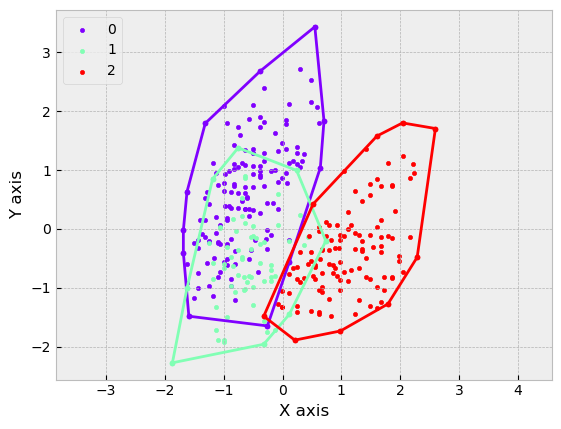

In [191]:
df = pd.read_csv("datasets/penguins.csv")
df.dropna(inplace=True)

# Generate numeric target labels
penguinsTarget = getNumericTargetFromDataframe(df['species'])

# Drop target column
df.drop(columns=['species', 'island', 'sex'], inplace=True)

pca = PCA(n_components=2, whiten=True)

pca.fit(df)

penguins2D = pca.transform(df)

plotConvexHullDatabases(penguinsTarget, penguins2D)

### **Passo 2: Filtragem de dados** 

O dataset aparenta ser QUASE separável para a categoria 2, vamos adaptar o dataset para construir uma reta mesmo assim. Isso será feito da seguinte forma:

- Limpar uma seção horizontal ou vertical de pontos, adicionando-se os pontos removidos aos dados de testes.
- Gerar o modelo com o dataset resultante.
- Executar os testes normalmente, os pontos removidos anteriormente serão testados no modelo.

Assim, será gerado um modelo que QUASE separa todos os dados de forma precisa, mas deve apresentar erros devido aos pontos filtrados nesta etapa.

**Nota:** O modelo será criado usando dados de treinamento filtrados, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

*A cada vez que essa célula é executada, uma nova amostra aleatória de (aproximadamente) 70/30 é realizada.*

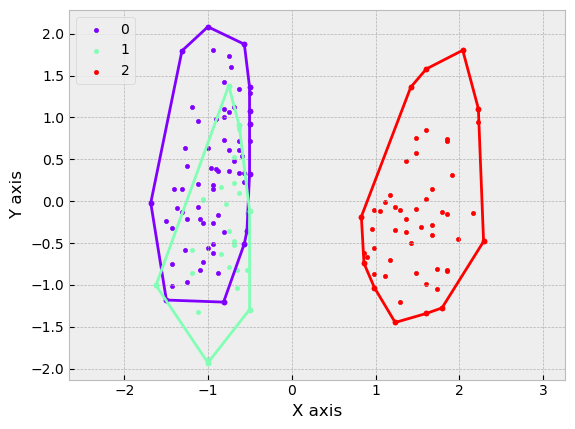

In [192]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingDataFiltered(penguins2D, penguinsTarget, X_AXIS, -0.5, 0.8)

plotConvexHullDatabases(trainingDataLabel, trainingData)

### **Passo 3: Criação do modelo (se separável)** 

O dataset aparenta ser separável para a categoria 0, assim o modelo será construído usando essa categoria como base.

O modelo resultante é binário e classifica os pontos em pertence à categoria 0 ou não pertence.

**Nota:** O modelo será criado usando dados de treinamento, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

*A cada vez que essa célula é executada, uma nova amostra aleatória de 70/30 é realizada.*

Selected hulls do not intersect, generating model...


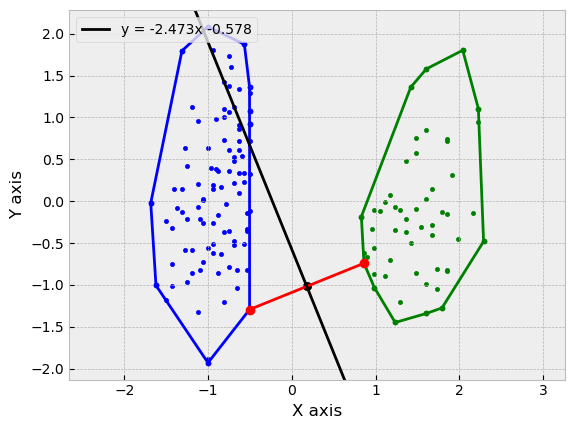

In [193]:
targetToBeSeparated = 2

slope, intercept = generateModelAndPlot(trainingData, trainingDataLabel, targetToBeSeparated)

### **Passo 4: Execução de testes e coleta de métricas**

A partir do modelo resultante (equação da reta). Os dados de teste são usados para avaliar seu desempenho.

In [195]:
direction = getOrientationConvexHullTargetToModel(trainingData, trainingDataLabel, slope, intercept, targetToBeSeparated)

precision, recall, f1 = runModelAndGetMetrics(testData, testDataLabel, targetToBeSeparated, direction, slope, intercept)

print(f"Precision: {precision:1f} %")
print(f"Recall: {recall:1f} %")
print(f"F1-Score: {f1:1f} %")

True Positive: 57 False Positive: 57 True Negative: 61 False Negative: 9

Precision: 50.000000 %
Recall: 86.363636 %
F1-Score: 63.333333 %


### **Passo 5: Análise dos resultados**

Como os dados não eram separáveis após o PCA, forçamos a separação removendo alguns dados que se interceptavam e os adicionando aos dados de teste. Por conta disso, a reta gerada no modelo não conseguiu classificar bem todos os dados, errando justamente nos pontos que estavam na interseção. Por isso ocorrem valores de falso positivo e falso negativo. Dessa forma, os valores de precisão e recall são impactados, o que abaixa o resultado também do f1-score. 

Em específico, como a interseção ocorreu com vários pontos do lado direito da reta, o modelo obteve vários falsos positivos, impactando com mais intensidade a métrica de precisão.


---

# Dataset 6: Magic
*Extraído de https://github.com/Mereep/keel_csv/blob/master/standard_classification/onehot/magic.prepared.csv*

### **Passo 1: Tratamento de dados** 

Carregar o dataset e realizar a projeção em 2 dimensões

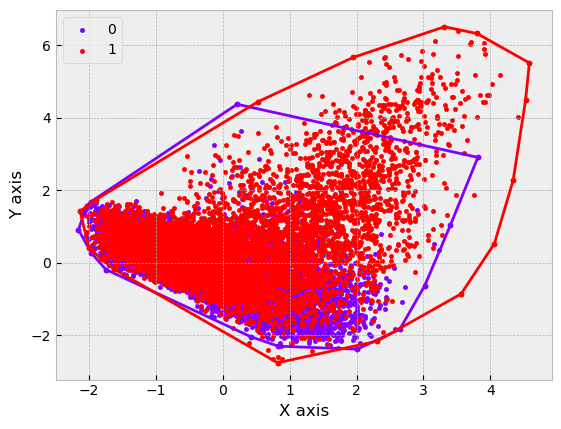

In [36]:
df = pd.read_csv("datasets/magic.prepared.csv")
df.dropna(inplace=True)

# Generate numeric target labels
magicTarget = getNumericTargetFromDataframe(df['Class'])

# Drop target column and non-numeric ones
df.drop(columns=['Class'], inplace=True)

pca = PCA(n_components=2, whiten=True)

pca.fit(df)

magic2D = pca.transform(df)

plotConvexHullDatabases(magicTarget, magic2D, scaleEqual=False)

### **Passo 2: Criação do modelo (se separável)** 

O dataset apresenta uma grande interseção de dados, sendo praticamente impossível separar os dados pelas categorias dessa forma.

**Nota:** O modelo será criado usando dados de treinamento, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

*A cada vez que essa célula é executada, uma nova amostra aleatória de (aproximadamente) 70/30 é realizada.*

Dessa forma, ao gerar os dados de treino e de teste, ao plotar os valores e gerar o modelo, confirmamos não temos como separar os dados. Tal fato é exemplificado com as chamadas para geração do modelo para ambas as categorias, sendo impresso que ocorre interseção em ambos os casos.

In [37]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingData(magic2D, magicTarget)

generateModelAndPlot(trainingData, trainingDataLabel, 0)
generateModelAndPlot(trainingData, trainingDataLabel, 1)

Selected hulls intersect for target ID 0. Unable to generate model due to data being inseparable
Selected hulls intersect for target ID 1. Unable to generate model due to data being inseparable


### **Passo 5: Análise dos resultados**

Como os dados estavam praticamente juntos após o PCA, não foi possível criar o modelo, nem mesmo retirando os pontos que estavam na interseção, já que compreendem a maior parte dos pontos do dataset.

---

# Dataset 7: Segment
*Extraído de https://github.com/Mereep/keel_csv/blob/master/standard_classification/onehot/segment.prepared.csv*

### **Passo 1: Tratamento de dados** 

Carregar o dataset e realizar a projeção em 2 dimensões

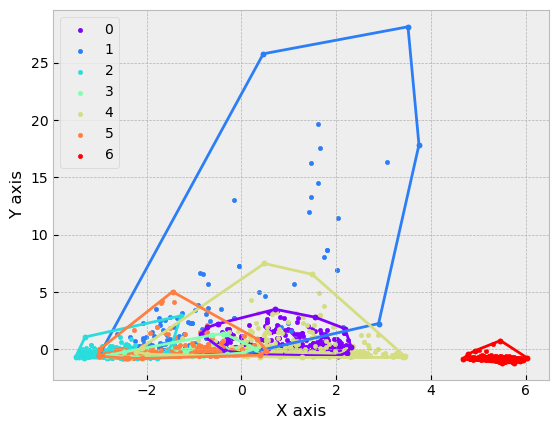

In [197]:
df = pd.read_csv("datasets/segment.prepared.csv")

# Generate numeric target labels
segmentsTarget = getNumericTargetFromDataframe(df['Class'])

# Drop target column
df.drop(columns=['Class'], inplace=True)

pca = PCA(n_components=2)

pca.fit(df)

segments2D = pca.transform(df)

plotConvexHullDatabases(segmentsTarget, segments2D, scaleEqual=False)

### **Passo 2: Criação do modelo (se separável)** 

O dataset aparenta ser separável para a categoria 6, assim o modelo será construído usando essa categoria como base.

O modelo resultante é binário e classifica os pontos em pertence à categoria 6 ou não pertence.

**Nota:** O modelo será criado usando dados de treinamento, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

*A cada vez que essa célula é executada, uma nova amostra aleatória de (aproximadamente) 70/30 é realizada.*

Selected hulls do not intersect, generating model...


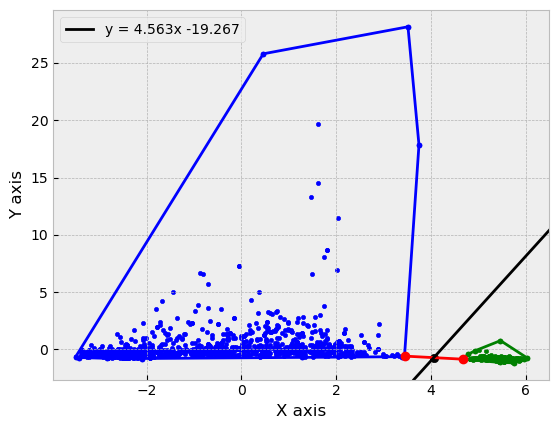

In [210]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingData(segments2D, segmentsTarget)

targetToBeSeparated = 6

slope, intercept = generateModelAndPlot(trainingData, trainingDataLabel, targetToBeSeparated, scaleEqual=False)

### **Passo 3: Execução de testes e coleta de métricas**

A partir do modelo resultante (equação da reta). Os dados de teste são usados para avaliar seu desempenho.

In [211]:
direction = getOrientationConvexHullTargetToModel(trainingData, trainingDataLabel, slope, intercept, targetToBeSeparated)

precision, recall, f1 = runModelAndGetMetrics(testData, testDataLabel, targetToBeSeparated, direction, slope, intercept)

print(f"Precision: {precision:1f} %")
print(f"Recall: {recall:1f} %")
print(f"F1-Score: {f1:1f} %")

True Positive: 87 False Positive: 0 True Negative: 584 False Negative: 0

Precision: 100.000000 %
Recall: 100.000000 %
F1-Score: 100.000000 %


### **Passo 4: Análise dos resultados**

De acordo com os resultados obtidos, percebemos que o modelo criado foi capaz de classificar todos os dados corretamente, sem nenhum falso positivo ou falso negativo. Isso ocorreu pois após o PCA, os dados não apresentaram interseccção entre a categoria 0 e as demais, sendo possível traçar uma reta que explicasse a separação entre os valores.

---

# Dataset 8: Two Norm
*Extraído de https://github.com/Mereep/keel_csv/blob/master/standard_classification/onehot/twonorm.prepared.csv*

### **Passo 1: Tratamento de dados** 

Carregar o dataset e realizar a projeção em 2 dimensões

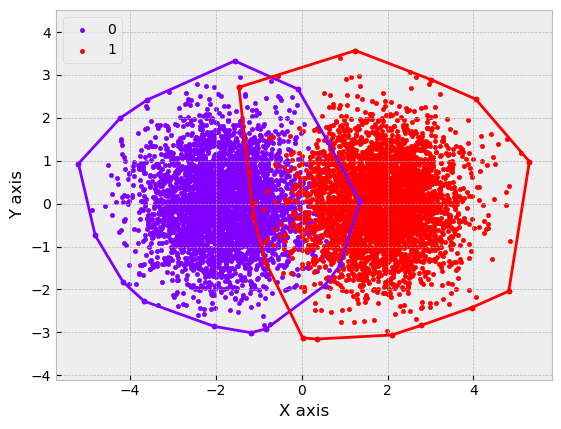

In [212]:
df = pd.read_csv("datasets/twonorm.prepared.csv")

# Generate numeric target labels
twonormTarget = getNumericTargetFromDataframe(df['Class'])

# Drop target column
df.drop(columns=['Class'], inplace=True)

pca = PCA(n_components=2)

pca.fit(df)

twonorm2D = pca.transform(df)

plotConvexHullDatabases(twonormTarget, twonorm2D)

### **Passo 2: Filtragem de dados** 

O dataset aparenta ser QUASE separável para a categoria 0, vamos adaptar o dataset para construir uma reta mesmo assim. Isso será feito da seguinte forma:

- Limpar uma seção horizontal ou vertical de pontos, adicionando-se os pontos removidos aos dados de testes.
- Gerar o modelo com o dataset resultante.
- Executar os testes normalmente, os pontos removidos anteriormente serão testados no modelo.

Assim, será gerado um modelo que QUASE separa todos os dados de forma precisa, mas deve apresentar erros devido aos pontos filtrados nesta etapa.

**Nota:** O modelo será criado usando dados de treinamento filtrados, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

*A cada vez que essa célula é executada, uma nova amostra aleatória de (aproximadamente) 70/30 é realizada.*

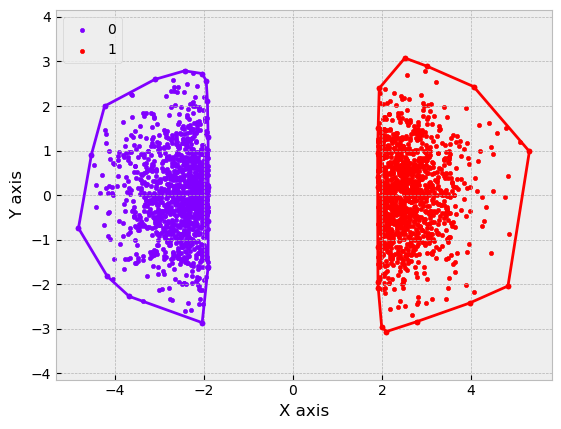

In [213]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingDataFiltered(twonorm2D, twonormTarget, X_AXIS, -1.9, 1.9)

plotConvexHullDatabases(trainingDataLabel, trainingData)

### **Passo 3: Criação do modelo (se separável)** 

O dataset aparenta ser separável para a categoria 0, assim o modelo será construído usando essa categoria como base.

O modelo resultante é binário e classifica os pontos em pertence à categoria 0 ou não pertence.

**Nota:** O modelo será criado usando dados de treinamento, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

*A cada vez que essa célula é executada, uma nova amostra aleatória de 70/30 é realizada.*

Selected hulls do not intersect, generating model...


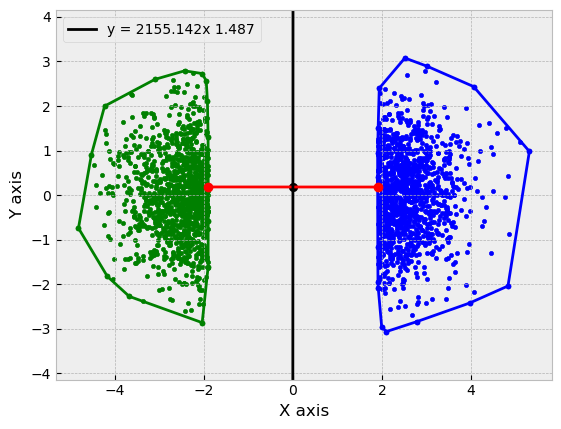

In [214]:
targetToBeSeparated = 0

slope, intercept = generateModelAndPlot(trainingData, trainingDataLabel, targetToBeSeparated)

### **Passo 4: Execução de testes e coleta de métricas**

A partir do modelo resultante (equação da reta). Os dados de teste são usados para avaliar seu desempenho.

In [217]:
direction = getOrientationConvexHullTargetToModel(trainingData, trainingDataLabel, slope, intercept, targetToBeSeparated)

precision, recall, f1 = runModelAndGetMetrics(testData, testDataLabel, targetToBeSeparated, direction, slope, intercept)

print(f"Precision: {precision:1f} %")
print(f"Recall: {recall:1f} %")
print(f"F1-Score: {f1:1f} %")

True Positive: 2399 False Positive: 73 True Negative: 2389 False Negative: 86

Precision: 97.046926 %
Recall: 96.539235 %
F1-Score: 96.792415 %


### **Passo 5: Análise dos resultados**

Como os dados não eram separáveis após o PCA, forçamos a separação removendo alguns dados que se interceptavam e os adicionando aos dados de teste. Por conta disso, a reta gerada no modelo não conseguiu classificar bem todos os dados, errando justamente nos pontos que estavam na interseção. Por isso ocorrem valores de falso positivo e falso negativo. Dessa forma, os valores de precisão e recall são impactados, o que abaixa o resultado também do f1-score. 

Como possível ver nos resultados da célula acima, mesmo que ocorreram falsos positivos e negativos por conta dos pontos da interseção, como esse dataset contêm uma grande quantidade de pontos que estavam bem separados (do lado direito e do lado esquerdo), a reta conseguiu classificar corretamente a grande maioria dos pontos, o que fez que mesmo com os valores classificados errado, as métricas de precisão, recall e f1-score não fossem tão impactadas.

---

# Dataset 9: New Thyroid
*Extraído de https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris*

### **Passo 1: Tratamento de dados** 

Carregar o dataset e realizar a projeção em 2 dimensões

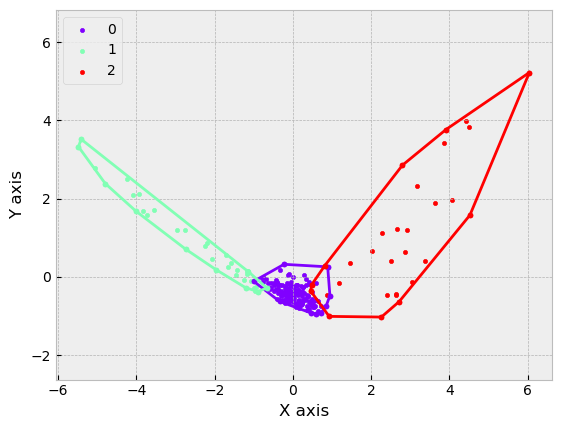

In [218]:
df = pd.read_csv("datasets/newthyroid.prepared.csv")

# Generate numeric target labels
newthyroidTarget = getNumericTargetFromDataframe(df['Class'])

# Drop target column
df.drop(columns=['Class'], inplace=True)

pca = PCA(n_components=2)

pca.fit(df)

newthyroid2D = pca.transform(df)

plotConvexHullDatabases(newthyroidTarget, newthyroid2D)

### **Passo 2: Filtragem de dados** 

O dataset aparenta ser QUASE separável para a categoria 1, vamos adaptar o dataset para construir uma reta mesmo assim. Isso será feito da seguinte forma:

- Limpar uma seção horizontal ou vertical de pontos, adicionando-se os pontos removidos aos dados de testes.
- Gerar o modelo com o dataset resultante.
- Executar os testes normalmente, os pontos removidos anteriormente serão testados no modelo.

Assim, será gerado um modelo que QUASE separa todos os dados de forma precisa, mas deve apresentar erros devido aos pontos filtrados nesta etapa.

**Nota:** O modelo será criado usando dados de treinamento filtrados, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

*A cada vez que essa célula é executada, uma nova amostra aleatória de 70/30 é realizada.*

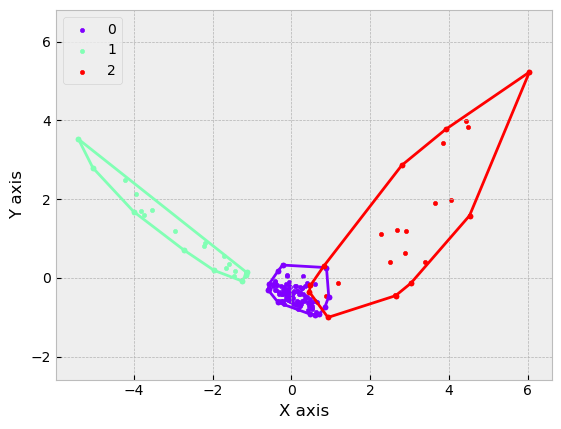

In [279]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingDataFiltered(newthyroid2D, newthyroidTarget, X_AXIS, -1.1, -0.6)

plotConvexHullDatabases(trainingDataLabel, trainingData)

### **Passo 3: Criação do modelo (se separável)** 

O dataset aparenta ser separável para a categoria 1, assim o modelo será construído usando essa categoria como base.

O modelo resultante é binário e classifica os pontos em pertence à categoria 1 ou não pertence.

**Nota:** O modelo será criado usando dados de treinamento, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

*A cada vez que essa célula é executada, uma nova amostra aleatória de 70/30 é realizada.*

Selected hulls do not intersect, generating model...


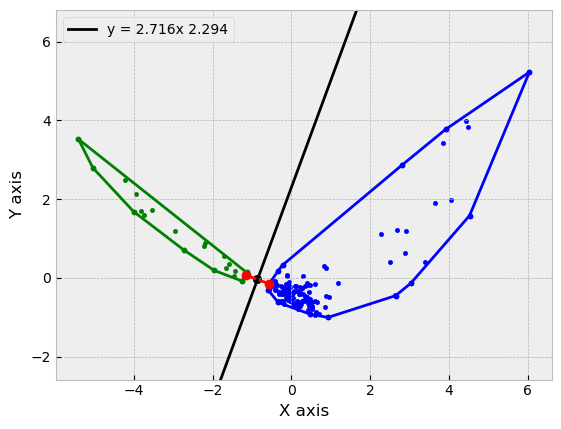

In [280]:
targetToBeSeparated = 1

slope, intercept = generateModelAndPlot(trainingData, trainingDataLabel, targetToBeSeparated)

### **Passo 4: Execução de testes e coleta de métricas**

A partir do modelo resultante (equação da reta). Os dados de teste são usados para avaliar seu desempenho.

In [281]:
direction = getOrientationConvexHullTargetToModel(trainingData, trainingDataLabel, slope, intercept, targetToBeSeparated)

precision, recall, f1 = runModelAndGetMetrics(testData, testDataLabel, targetToBeSeparated, direction, slope, intercept)

print(f"Precision: {precision:1f} %")
print(f"Recall: {recall:1f} %")
print(f"F1-Score: {f1:1f} %")

True Positive: 9 False Positive: 1 True Negative: 48 False Negative: 4

Precision: 90.000000 %
Recall: 69.230769 %
F1-Score: 78.260870 %


### **Passo 5: Análise dos resultados**

Como os dados não eram separáveis após o PCA, forçamos a separação removendo alguns dados que se interceptavam e os adicionando aos dados de teste. Por conta disso, a reta gerada no modelo não conseguiu classificar bem todos os dados, errando justamente nos pontos que estavam na interseção. Por isso ocorrem valores de falso positivo e falso negativo. Dessa forma, os valores de precisão e recall são impactados, o que abaixa o resultado também do f1-score. 

Em específico, como a interseção ocorreu com vários pontos ao centro esquerda da reta (que visulamente contem a maior parte dos dados), ocorreram no geral poucos erros falsos positivos, porém tivemos mais falsos negativos, impactando com mais intensidade a métrica de recall.

---

# Dataset 10: Ecoli
*Extraído de https://github.com/Mereep/keel_csv/blob/master/standard_classification/onehot/ecoli.prepared.csv*

### **Passo 1: Tratamento de dados** 

Carregar o dataset e realizar a projeção em 2 dimensões

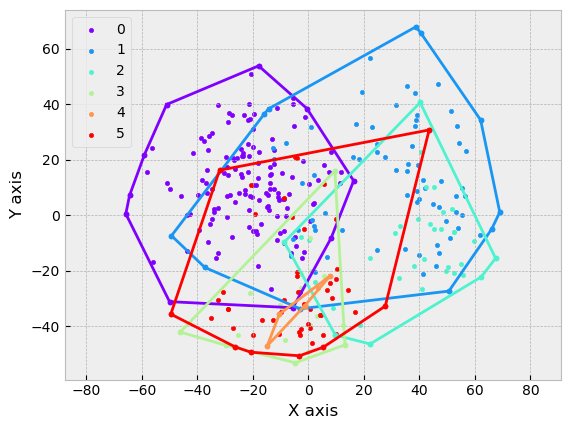

In [282]:
df = pd.read_csv("datasets/ecoli.csv")

# Generate numeric target labels from Site column
ecoliTarget = getNumericTargetFromDataframe(df['Site'])

# Drop non-numeric
df.drop(columns=['Site'], inplace=True)

pca = PCA(n_components=2)

pca.fit(df)

ecoli2D = pca.transform(df)

plotConvexHullDatabases(ecoliTarget, ecoli2D)

### **Passo 2: Criação do modelo (se separável)** 

O dataset apresenta uma grande interseção de dados, sendo praticamente impossível separar os dados pelas categorias dessa forma.

**Nota:** O modelo será criado usando dados de treinamento, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

*A cada vez que essa célula é executada, uma nova amostra aleatória de (aproximadamente) 70/30 é realizada.*

Dessa forma, ao gerar os dados de treino e de teste, ao plotar os valores e gerar o modelo, confirmamos não temos como separar os dados. Tal fato é exemplificado com as chamadas para geração do modelo para ambas as categorias, sendo impresso que ocorre interseção em ambos os casos. Especificamente na classe 4, é informado que ela está dentro de outra envoltória, o que é verificado ao olhar o plot e perceber que essa envoltória é a menor e praticamente está no centro de todas as outras.

In [283]:
generateModelAndPlot(ecoli2D, ecoliTarget, 0)
generateModelAndPlot(ecoli2D, ecoliTarget, 1)
generateModelAndPlot(ecoli2D, ecoliTarget, 2)
generateModelAndPlot(ecoli2D, ecoliTarget, 3)
generateModelAndPlot(ecoli2D, ecoliTarget, 4)
generateModelAndPlot(ecoli2D, ecoliTarget, 5)

Selected hulls intersect for target ID 0. Unable to generate model due to data being inseparable
Selected hulls intersect for target ID 1. Unable to generate model due to data being inseparable
Selected hulls intersect for target ID 2. Unable to generate model due to data being inseparable
Selected hulls intersect for target ID 3. Unable to generate model due to data being inseparable
At least one hull is inside another for target ID 4. Unable to generate model due to data being inseparable
Selected hulls intersect for target ID 5. Unable to generate model due to data being inseparable


### **Passo 5: Análise dos resultados**

Como os dados estavam praticamente juntos após o PCA, não foi possível criar o modelo, nem mesmo retirando os pontos que estavam na interseção, já que compreendem a maior parte dos pontos do dataset.